# Homework 03 – Probability

#  Theory
3. Consider the standard game of 20 questions as described in the following pseudo code:
 standard game of 20 questions (interleaved questions and answers)
Winner = Person A
Person A chooses an object X but doesn’t tell Person B what object X they chose
For q = 1 to 20
Person B asks a yes or no question to help determine what the object is
Person A responds truthfully with yes or no
If the question asked by Person B is “Is the object X” then
Winner = Person B
Break
See https://en.wikipedia.org/wiki/Twenty_Questions or other web sites if you’re unfamiliar with
the game.
Now consider a modified version of 20 questions where
 modified game of 20 questions (all questions then all answers then 1 guess)
Winner = Person A
Person A chooses an object X but doesn’t tell Person B what object X they chose
For q = 1 to 19
Person B asks a yes or no question to help determine what the object is
For q = 1 to 19
Person A responds truthfully with yes or no to each question q from Person B
Person B asks “Is the object Y?”
If X == Y
Winner = Person B


3.A. You’re Person B and want to win. Which version of the game do you play, the standard or
the modified? Why?

__The standard game. Because each question that passes introduces new knowledge that can be used to create more insightful questions.__


3.B. Consider a classification network where multiple CNN or RNN layers transform a data tensor
to a feature vector and a dense layer transforms the feature vector to a class pmf vector:
Data tensor ® [multiple layers] ® feature vector ® [dense layer] ® class pmf vector
Is this more similar to the standard or modified version of 20 questions? Why?

__This is more similar to the standard version because each subsequent layer can derive new information from the outputs of the prior layer. One could think of this as encoding the strategies of questions to ask that lead to a correct prediction.__


3.C. Change the standard game such that with some probability Person A will answer each
question incorrectly. How does this change the strategy of Person B? After answering this
question, look at the chain rule of probability with the correct given values replaced by estimates
that may or may not be correct (i.e., instead of the typical p(xn-1 | xn-2, …, x0) consider p(xn-1 | xn2
hat, …, x0
hat) where hat indicates estimate).


__Assuming that the probability of misinformation is small, subsequent questions will have to be designed to have overlapping conclusions. This way Agent B is essentially "Double-checking" their conclusions by coming to a logical conclusion from multiple directions. (Similar to how interrogators come to conclusions by learning from contradictions)__

3.D. Now change the modified game such that with some probability Person A will answer each
question incorrectly. How does this change the strategy of Person B? After answering this
question, think about the number of features vs the number of classes that are being estimated.

__The strategy should be similar to above. Come up with questions that have similar comclusions. (Is Y a living thing? No. -> Does Y produce heat? Yes -> could be a hot nonliving mineral (somewhat likely), or could have lied in the first question (equally likely)__

4. A multiple choice test can be viewed as a test with an implicit curve that is noisy and grade
dependent. Consider a 100 question ABCD multiple choice test and assume that for each
question on the test a person either knows the answer or has no idea and makes a totally
random guess. Define the implicit curve as the number of questions answered correctly via
knowledge or guess minus the number of questions answered correctly via knowledge. For
example, a person knows the answer to 73 questions, guesses on 27 questions and gets a total
of 79 questions correct; the implicit curve for this case would be 79 – 73 = 6. Plot the mean and
standard deviation of the implicit curve vs the number of questions that a person answered 
correctly via knowledge. Use Python to simulate many trials for each point and Matplotlib to
plot.

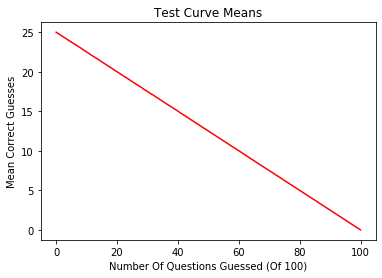

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
plt.style.use('seaborn-pastel')
%matplotlib inline

#MONTE CARLO BABY!
PROB_OF_KNOWING = 0.5 #->Binomial distr.
NUMBER_OF_Qs = 100
NUMBER_OF_ANSWERS=4
NUMBER_OF_STUDENTS = 100*1000

def simulate_curve():
    num_known = np.arange(0, NUMBER_OF_Qs+1, 1)
    num_unknown = NUMBER_OF_Qs - num_known
    num_unknown_correct  = np.random.binomial(num_unknown, 1/NUMBER_OF_ANSWERS, size=(NUMBER_OF_STUDENTS, NUMBER_OF_Qs+1))
    return num_unknown_correct

curve = simulate_curve()
curve_mean = np.mean(curve, axis=0)
curve_std = np.std(curve, axis=0)

x = np.arange(0, NUMBER_OF_Qs+1, 1)

fig = plt.figure()
plt.title("Test Curve Means")
plt.plot(x, curve_mean, c='r')
plt.ylabel("Mean Correct Guesses")
plt.xlabel("number of questions Guessed (of 100)".title())
plt.show()

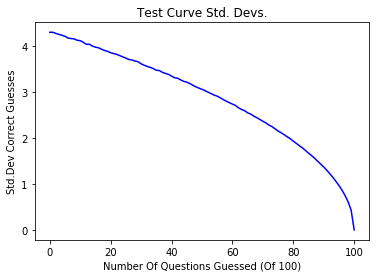

In [2]:
fig = plt.figure()
plt.title("Test Curve Std. Devs.")
plt.plot(x, curve_std, c='b')
plt.ylabel("Std.Dev Correct Guesses")
plt.xlabel("number of questions Guessed (of 100)".title())
plt.show()

5. Assume ImageNet has 1.28 million images of size 3 x 256 x 256 with 1280 images each in
1000 different classes. How many bits of information are in the ImageNet labels?


In [3]:
import math
bits_per_example = 1000*(-1/1000)*math.log2(1/1000)
bits_image_net = 1.28e6*bits_per_example
print("bits_per_example", round(bits_per_example,2))
print("bits_image_net", round(bits_image_net,2))

bits_per_example 9.97
bits_image_net 12756203.88


#  Practice
Starting from the previous example of a simple sequential CNN for CIFAR-10 image classification, do the following:

- Add data augmentation (see the training slides or search online for some options)
- Add batch normalization (replace CNN style 2D convolution layers which include bias and ReLU with CNN style 2D convolution, batch normalization and ReLU layers)
- Add L2 regularization (see the training slides for motivation)


What is the best accuracy value the network achieves on the test set before and after these modifications? List the corresponding training hyperparameters for both cases.

In [4]:
################################################################################
#
# xNNs_Code_020_CIFAR.py
#
# DESCRIPTION
#
#    TensorFlow image classification using CIFAR
#
# INSTRUCTIONS
#
#    1. Go to Google Colaboratory: https://colab.research.google.com/notebooks/welcome.ipynb
#    2. File - New Python 3 notebook
#    3. Cut and paste this file into the cell (feel free to divide into multiple cells)
#    4. Runtime - Change runtime type - Hardware accelerator - GPU
#    5. Runtime - Run all
#
# NOTES
#
#    1. This configuration achieves 90.4% accuracy in 30 epochs with each epoch
#       taking ~ 24s on Google Colab.  Accuracy can be improved via
#       - Improved training data augmentation
#       - Improved network design
#       - Improved network training
#
#    2. Examples (currently commented out) are included for the following
#       - Computing the dataset mean and std dev
#       - Restarting training after a crash from the last saved checkpoint
#       - Saving and loading the model in Keras H5 format
#       - Saving and loading the model in TensorFlow SavedModel format
#       - Getting a list of all feature maps
#       - Creating an encoder only model
#
################################################################################

################################################################################
#
# IMPORT
#
################################################################################


# install tensorflow 2 and tensorflow datasets on a personal machine
# !pip install tensorflow-gpu
# !pip install tensorflow-datasets

# tenorflow
import tensorflow as     tf
from   tensorflow import keras

# tensorflow datasets
import tensorflow_datasets as tfds

# additional libraries
import math
import numpy             as np
import matplotlib.pyplot as plt
%matplotlib inline

# version check
print(tf.__version__)

2.1.0


In [5]:
################################################################################
#
# PARAMETERS
#
################################################################################

# data
DATA_NUM_CLASSES        = 10
DATA_CHANNELS           = 3
DATA_ROWS               = 32
DATA_COLS               = 32
DATA_CROP_ROWS          = 28
DATA_CROP_COLS          = 28
DATA_MEAN               = np.array([[[125.30691805, 122.95039414, 113.86538318]]]) # CIFAR10
DATA_STD_DEV            = np.array([[[ 62.99321928,  62.08870764,  66.70489964]]]) # CIFAR10

# model
MODEL_LEVEL_0_REPEATS   = 3
MODEL_LEVEL_1_REPEATS   = 3
MODEL_LEVEL_2_REPEATS   = 3

# training
TRAINING_BATCH_SIZE      = 32
TRAINING_SHUFFLE_BUFFER  = 5000
TRAINING_LR_MAX          = 0.001
# TRAINING_LR_SCALE        = 0.1
# TRAINING_LR_EPOCHS       = 2
TRAINING_LR_INIT_SCALE   = 0.01
TRAINING_LR_INIT_EPOCHS  = 5
TRAINING_LR_FINAL_SCALE  = 0.01
TRAINING_LR_FINAL_EPOCHS = 25

# training (derived)
TRAINING_NUM_EPOCHS = TRAINING_LR_INIT_EPOCHS + TRAINING_LR_FINAL_EPOCHS
TRAINING_LR_INIT    = TRAINING_LR_MAX*TRAINING_LR_INIT_SCALE
TRAINING_LR_FINAL   = TRAINING_LR_MAX*TRAINING_LR_FINAL_SCALE

# saving
SAVE_MODEL_PATH = './save/model/'
#!mkdir "$SAVE_MODEL_PATH"

In [6]:
################################################################################
#
# DATA
#
################################################################################

# pre processing for training data
def pre_processing_train(example):

    # extract image and label from example
    image = example["image"]
    label = example["label"]
  
    # image is cast to float32, normalized, augmented and random cropped
    # label is cast to int32
    image = tf.math.divide(tf.math.subtract(tf.dtypes.cast(image, tf.float32), DATA_MEAN), DATA_STD_DEV)
    image = tf.image.random_brightness(image, 0.2, seed=1)
    image = tf.image.random_crop(image, size=[DATA_CROP_ROWS, DATA_CROP_COLS, 3], seed=1)
    image = tf.image.random_flip_left_right(image, seed=1)
    label = tf.dtypes.cast(label, tf.int32)
    
    # return image and label
    return image, label

# pre processing for testing data
def pre_processing_test(example):

    # extract image and label from example
    image = example["image"]
    label = example["label"]

    # image is cast to float32, normalized, augmented and center cropped
    # label is cast to int32
    image = tf.math.divide(tf.math.subtract(tf.dtypes.cast(image, tf.float32), DATA_MEAN), DATA_STD_DEV)
    image = tf.image.crop_to_bounding_box(image, (DATA_ROWS - DATA_CROP_ROWS) // 2, (DATA_COLS - DATA_CROP_COLS) // 2, DATA_CROP_ROWS, DATA_CROP_COLS)
    label = tf.dtypes.cast(label, tf.int32)
    
    # return image and label
    return image, label

# download data and split into training and testing datasets
# download data and split into training and testing datasets
dataset_train, info = tfds.load("cifar10", split=tfds.Split.TRAIN, with_info=True)
dataset_test,  info = tfds.load("cifar10", split=tfds.Split.TEST,  with_info=True)

# d
# debug - datasets
#print(train_images) # <_OptionsDataset shapes: {image: (32, 32, 3), label: ()}, types: {image: tf.uint8, label: tf.int64}>
# print(dataset_test)  # <_OptionsDataset shapes: {image: (32, 32, 3), label: ()}, types: {image: tf.uint8, label: tf.int64}>

In [7]:
# transform training dataset
dataset_train = dataset_train.map(pre_processing_train, num_parallel_calls=4)
dataset_train = dataset_train.shuffle(buffer_size=TRAINING_SHUFFLE_BUFFER)
dataset_train = dataset_train.batch(TRAINING_BATCH_SIZE)
dataset_train = dataset_train.prefetch(buffer_size=10)

In [8]:
# transform testing dataset
dataset_test = dataset_test.map(pre_processing_test, num_parallel_calls=4)
dataset_test = dataset_test.batch(TRAINING_BATCH_SIZE)
dataset_test = dataset_test.prefetch(buffer_size=10)

# debug - datasets after transformation
# print(dataset_train) # <PrefetchDataset shapes: ((None, 28, 28, 3), (None,)), types: (tf.float32, tf.int32)>
# print(dataset_test)  # <PrefetchDataset shapes: ((None, 28, 28, 3), (None,)), types: (tf.float32, tf.int32)>

Model: "cifar_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_image (InputLayer)     [(None, 28, 28, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        864       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 32)        128       
_________________________________________________________________
re_lu (ReLU)                 (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9216      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
re_lu_1 (ReLU)               (None, 28, 28, 32)        

Epoch 13/30
1561/1563 [============================>.] - ETA: 0s - loss: 0.3400 - accuracy: 0.8899
Epoch 00013: val_loss did not improve from 0.51987
1563/1563 [==============================] - 19s 12ms/step - loss: 0.3401 - accuracy: 0.8898 - val_loss: 0.5648 - val_accuracy: 0.8187
Epoch 14/30
1558/1563 [============================>.] - ETA: 0s - loss: 0.3152 - accuracy: 0.8981
Epoch 00014: val_loss improved from 0.51987 to 0.49764, saving model to ./save/model/model_14.h5
1563/1563 [==============================] - 19s 12ms/step - loss: 0.3151 - accuracy: 0.8981 - val_loss: 0.4976 - val_accuracy: 0.8434
Epoch 15/30
1561/1563 [============================>.] - ETA: 0s - loss: 0.2911 - accuracy: 0.9057
Epoch 00015: val_loss did not improve from 0.49764
1563/1563 [==============================] - 19s 12ms/step - loss: 0.2912 - accuracy: 0.9056 - val_loss: 0.5123 - val_accuracy: 0.8392
Epoch 16/30
1559/1563 [============================>.] - ETA: 0s - loss: 0.2697 - accuracy: 0.9160


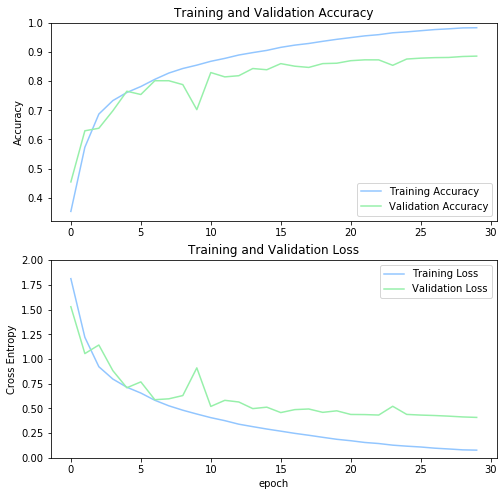

In [9]:
################################################################################
#
# MODEL
#
################################################################################

# create and compile model
def create_model(level_0_repeats, level_1_repeats, level_2_repeats):

    # encoder - input
    model_input = keras.Input(shape=(DATA_CROP_ROWS, DATA_CROP_COLS, DATA_CHANNELS), name='input_image')
    x = model_input
    
    # encoder - level 0
    for n0 in range(level_0_repeats):
        # x = keras.layers.Conv2D(32, 3, strides=1, padding='same', activation='relu', use_bias=True)(x)
        x = keras.layers.Conv2D(32, 3, strides=1, padding='same', activation=None, use_bias=False)(x)
        x = keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True)(x)
        x = keras.layers.ReLU()(x)
    x = keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x)

    # encoder - level 1
    for n1 in range(level_1_repeats):
        # x = keras.layers.Conv2D(64, 3, strides=1, padding='same', activation='relu', use_bias=True)(x)
        x = keras.layers.Conv2D(64, 3, strides=1, padding='same', activation=None, use_bias=False)(x)
        x = keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True)(x)
        x = keras.layers.ReLU()(x)
    x = keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x)
        
    # encoder - level 2
    for n2 in range(level_2_repeats):
        # x = keras.layers.Conv2D(128, 3, strides=1, padding='same', activation='relu', use_bias=True)(x)
        x = keras.layers.Conv2D(128, 3, strides=1, padding='same', activation=None, use_bias=False)(x)
        x = keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True)(x)
        x = keras.layers.ReLU()(x)

    # encoder - output
    encoder_output = x

    # decoder
    y = keras.layers.GlobalAveragePooling2D()(encoder_output)
    decoder_output = keras.layers.Dense(DATA_NUM_CLASSES, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2(1e-3))(y)
    
    # forward path
    model = keras.Model(inputs=model_input, outputs=decoder_output, name='cifar_model')

    # loss, backward path (implicit) and weight update
    model.compile(optimizer=tf.keras.optimizers.Adam(TRAINING_LR_MAX), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    # return model
    return model

# create and compile model
model = create_model(MODEL_LEVEL_0_REPEATS, MODEL_LEVEL_1_REPEATS, MODEL_LEVEL_2_REPEATS)

# model description and figure
model.summary()
keras.utils.plot_model(model, 'cifar_model.png', show_shapes=True)

# debug - model metrics (values returned from model.evaluate)
# print(model.metrics_names) # ['loss', 'accuracy']


################################################################################
#
# TRAIN AND VALIDATE
#
################################################################################

# learning rate schedule
def lr_schedule(epoch):

    # staircase
    # lr = TRAINING_LR_MAX*math.pow(TRAINING_LR_SCALE, math.floor(epoch/TRAINING_LR_EPOCHS))

    # linear warmup followed by cosine decay
    if epoch < TRAINING_LR_INIT_EPOCHS:
        lr = (TRAINING_LR_MAX - TRAINING_LR_INIT)*(float(epoch)/TRAINING_LR_INIT_EPOCHS) + TRAINING_LR_INIT
    else:
        lr = (TRAINING_LR_MAX - TRAINING_LR_FINAL)*max(0.0, math.cos(((float(epoch) - TRAINING_LR_INIT_EPOCHS)/(TRAINING_LR_FINAL_EPOCHS - 1.0))*(math.pi/2.0))) + TRAINING_LR_FINAL

    # debug - learning rate display
    # print(epoch)
    # print(lr)

    return lr

# plot training accuracy and loss curves
def plot_training_curves(history):

    # training and validation data accuracy
    acc     = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    # training and validation data loss
    loss     = history.history['loss']
    val_loss = history.history['val_loss']

    # plot accuracy
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.ylabel('Accuracy')
    plt.ylim([min(plt.ylim()), 1])
    plt.title('Training and Validation Accuracy')

    # plot loss
    plt.subplot(2, 1, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.ylabel('Cross Entropy')
    plt.ylim([0, 2.0])
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()

# callbacks (learning rate schedule, model checkpointing during training)
callbacks = [keras.callbacks.LearningRateScheduler(lr_schedule),
             keras.callbacks.ModelCheckpoint(filepath=SAVE_MODEL_PATH+'model_{epoch}.h5', save_best_only=True, monitor='val_loss', verbose=1)]

# training
initial_epoch_num = 0
history = model.fit(x=dataset_train, epochs=TRAINING_NUM_EPOCHS, verbose=1, callbacks=callbacks, validation_data=dataset_test, initial_epoch=initial_epoch_num)

# example of restarting training after a crash from the last saved checkpoint
# model             = create_model(MODEL_LEVEL_0_REPEATS, MODEL_LEVEL_1_REPEATS, MODEL_LEVEL_2_REPEATS)
# model.load_weights(SAVE_MODEL_PATH+'model_X.h5') # replace X with the last saved checkpoint number
# initial_epoch_num = X                            # replace X with the last saved checkpoint number
# history           = model.fit(x=dataset_train, epochs=TRAINING_NUM_EPOCHS, verbose=1, callbacks=callbacks, validation_data=dataset_test, initial_epoch=initial_epoch_num)

# plot accuracy and loss curves
plot_training_curves(history)

    313/Unknown - 2s 7ms/step - loss: 0.4086 - accuracy: 0.8860Test loss:      0.40862405482239234
Test accuracy:  0.886
Predicted label: 2 and actual label: 7


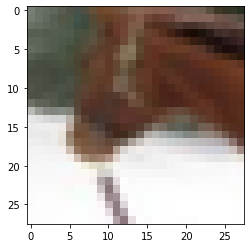

Predicted label: 0 and actual label: 0


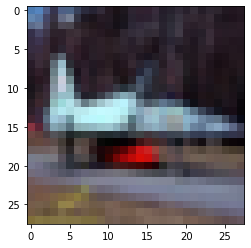

Predicted label: 6 and actual label: 6


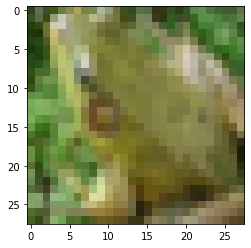

Predicted label: 9 and actual label: 9


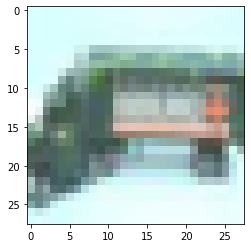

Predicted label: 5 and actual label: 5


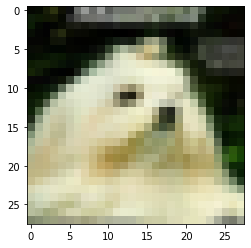

Predicted label: 1 and actual label: 1


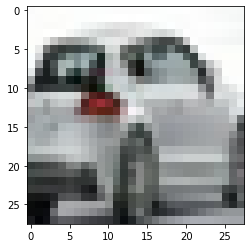

Predicted label: 7 and actual label: 7


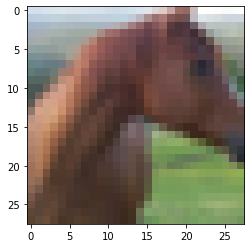

Predicted label: 9 and actual label: 0


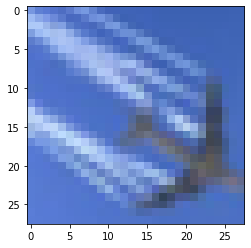

Predicted label: 5 and actual label: 3


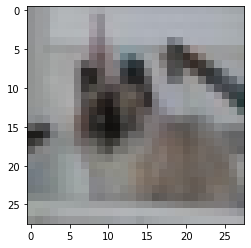

Predicted label: 2 and actual label: 2


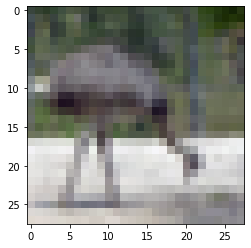

Predicted label: 7 and actual label: 7


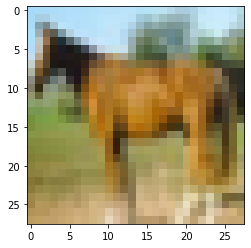

Predicted label: 2 and actual label: 2


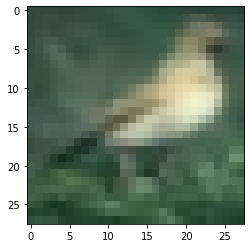

Predicted label: 7 and actual label: 7


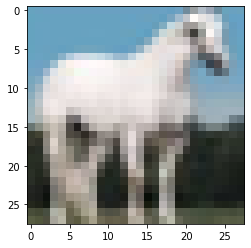

Predicted label: 9 and actual label: 9


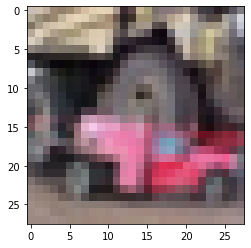

Predicted label: 3 and actual label: 6


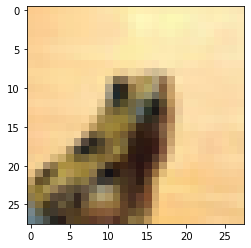

Predicted label: 0 and actual label: 8


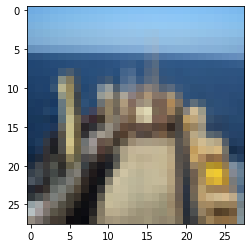

Predicted label: 0 and actual label: 8


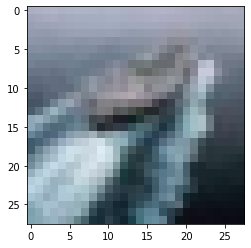

Predicted label: 8 and actual label: 8


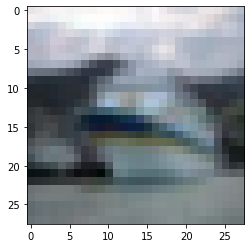

Predicted label: 7 and actual label: 7


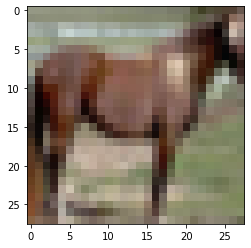

Predicted label: 9 and actual label: 9


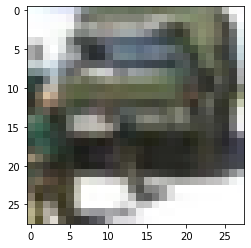

Predicted label: 4 and actual label: 4


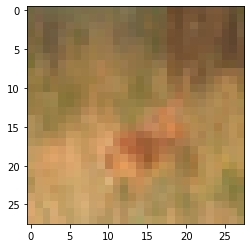

Predicted label: 2 and actual label: 2


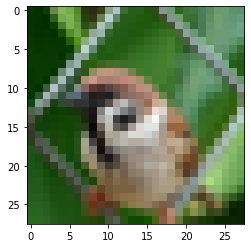

Predicted label: 3 and actual label: 3


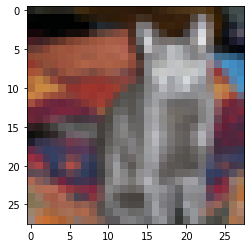

Predicted label: 5 and actual label: 5


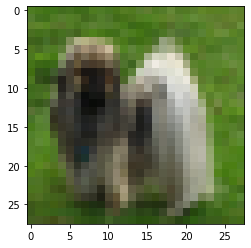

Predicted label: 3 and actual label: 0


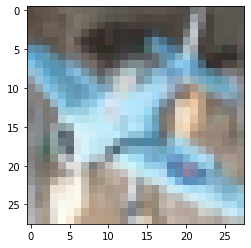

Predicted label: 0 and actual label: 0


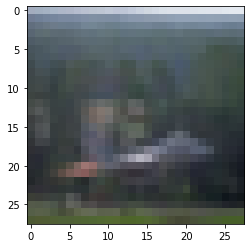

Predicted label: 2 and actual label: 2


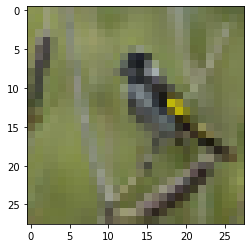

Predicted label: 8 and actual label: 8


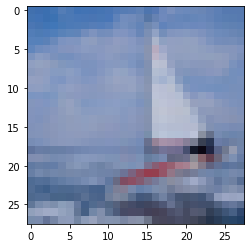

Predicted label: 1 and actual label: 1


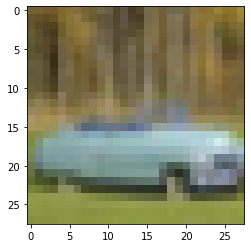

Predicted label: 8 and actual label: 8


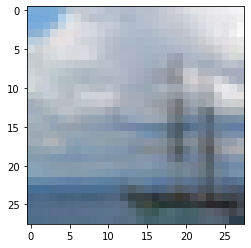

Predicted label: 2 and actual label: 2


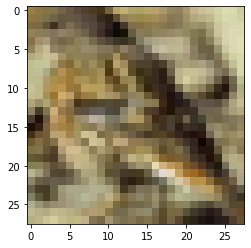

Predicted label: 2 and actual label: 0


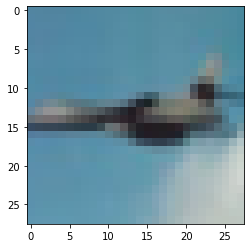

In [10]:
################################################################################
#
# TEST
#
################################################################################

# test
test_loss, test_accuracy = model.evaluate(x=dataset_test)
print('Test loss:     ', test_loss)
print('Test accuracy: ', test_accuracy)

# example of saving and loading the model in Keras H5 format
# this saves both the model and the weights
# model.save('./save/model/model.h5')
# new_model       = keras.models.load_model('./save/model/model.h5')
# predictions     = model.predict(x=dataset_test)
# new_predictions = new_model.predict(x=dataset_test)
# np.testing.assert_allclose(predictions, new_predictions, atol=1e-6)

# example of saving and loading the model in TensorFlow SavedModel format
# this saves both the model and the weights
# keras.experimental.export_saved_model(model, './save/model/')
# new_model       = keras.experimental.load_from_saved_model('./save/model/')
# predictions     = model.predict(x=dataset_test)
# new_predictions = new_model.predict(x=dataset_test)
# np.testing.assert_allclose(predictions, new_predictions, atol=1e-6)

# example of getting a list of all feature maps
# feature_map_list = [layer.output for layer in model.layers]
# print(feature_map_list)

# example of creating a model encoder
# replace X with the layer number of the encoder output
# model_encoder    = keras.Model(inputs=model.input, outputs=model.layers[X].output)
# model_encoder.summary()

################################################################################
#
# DISPLAY
#
################################################################################

# extract a batch from the testing dataset
# then extract images and labels for this batch
dataset_display                = dataset_test.take(1)
it                             = iter(dataset_display)
display_images, display_labels = next(it)

# predict pmf and labels for this dataset
predict_labels_pmf = model.predict(x=dataset_display)
predict_labels     = np.argmax(predict_labels_pmf, axis=1)

# for display normalize images to [0, 1]
display_images = ((display_images*DATA_STD_DEV.reshape((1, 1, 1, 3))) + DATA_MEAN.reshape((1, 1, 1, 3)))/255.0;

# cycle through the images in the batch
for image_index in range(predict_labels.size):
        
    # display the predicted label, actual label and image
    print('Predicted label: {0:1d} and actual label: {1:1d}'.format(predict_labels[image_index], display_labels[image_index]))
    plt.imshow(display_images[image_index, :, :, :])
    plt.show()

7. [Optional] Take the above trained network and save the intermediate feature maps xd after
ReLU for layer d for a batch of images (this should be a 4D tensor of batch x channel x rows x
cols). Quantize these feature maps to unsigned 8 bits ([0, 255]) via xq,d = round(255*xd/max(xd)).
How many bytes (elements) are there in the quantized feature maps? Now create a Huffman
code for this set of quantized feature maps and use it to compress the quantized feature maps.
How many bytes are in the Huffman encoded quantized feature maps? Which value in [0, 255] is
assigned the shortest code word? How does this result change for different layers d after
different ReLUs in the network?

In [14]:
x_batch, y_batch = next(iter(dataset_train))
print(x_batch.shape, y_batch.shape)

(32, 28, 28, 3) (32,)


In [26]:
def get_feature_maps(d):
    assert(d<=9)
    earlyPredictor = tf.keras.Model(model.inputs, model.get_layer(index = (3*d)+1).output)
    return earlyPredictor.predict(x_batch)

result = get_feature_maps(5)

In [68]:
#(batch, h, w, channel)
def E(p):
    return -1*p*math.log2(p)*8

def quantize_and_bits(result):
    num_elements = tf.reduce_prod(result.shape).numpy()
    result = tf.cast(result, tf.uint8)
    
    bit_sum = 0
    probs_saved = []
    for i in range(128):
        num_is = tf.reduce_sum(tf.cast(result==i, tf.float32)).numpy()
        p = (num_is+1)/num_elements
        bit_sum+=E(p) #+1 for LaPLace smoothing
        probs_saved.append(p)
    return bit_sum, probs_saved, result


def layer_to_bits(d):
    res = get_feature_maps(d)
    return quantize_and_bits(res)

Average Number of Bits: 6.981401964149399


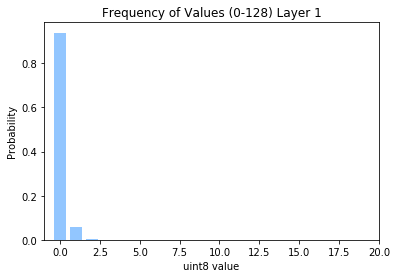

Average Number of Bits: 10.270074904064483


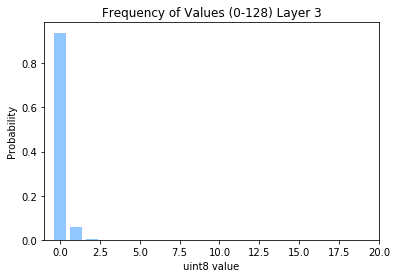

Average Number of Bits: 4.131113559162881


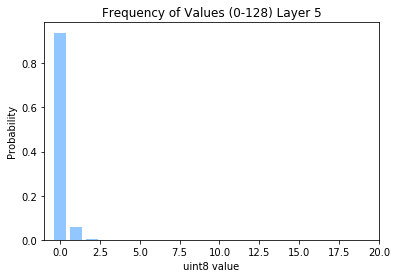

Average Number of Bits: 2.9687610976013987


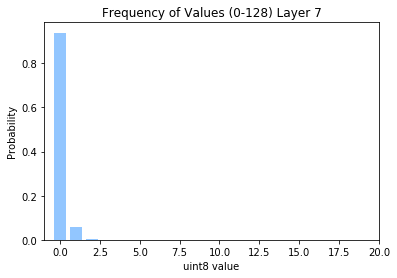

In [71]:
prob_list = []
for i in range(1,9,2):
    bits, probs, fm = layer_to_bits(i)
    print("Average Number of Bits: {}".format(bits))
    plt.title("Frequency of Values (0-128) Layer {}".format(i))
    plt.bar(np.arange(len(vals)),vals)
    plt.ylabel("Probability")
    plt.xlabel("uint8 value")
    plt.xlim(-1,20)
    plt.show()
    prob_list.append((i,probs))

 __Looks like later layers have more sparse activations. Value 0 should be given the shortest word in the Huffman Encoding.__
 
 ## Huffman Encoding
 
 - 0 = 111
 - 1 = 110
 - 2 = 101
 - 3 = 1001
 - 4 = 1000
 - rest = 17 bit encoding

In [ ]:
#(batch, h, w, channel)
def E(p):
    return -1*p*math.log2(p)*8